# Basic map of Arctic

This is a note using th Moonbooks guide for [mapping](https://en.moonbooks.org/Articles/How-to-plot-a-heatmap-over-polar-regions-using-cartopy-matplotlib-and-python-/) 


In [ ]:
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd

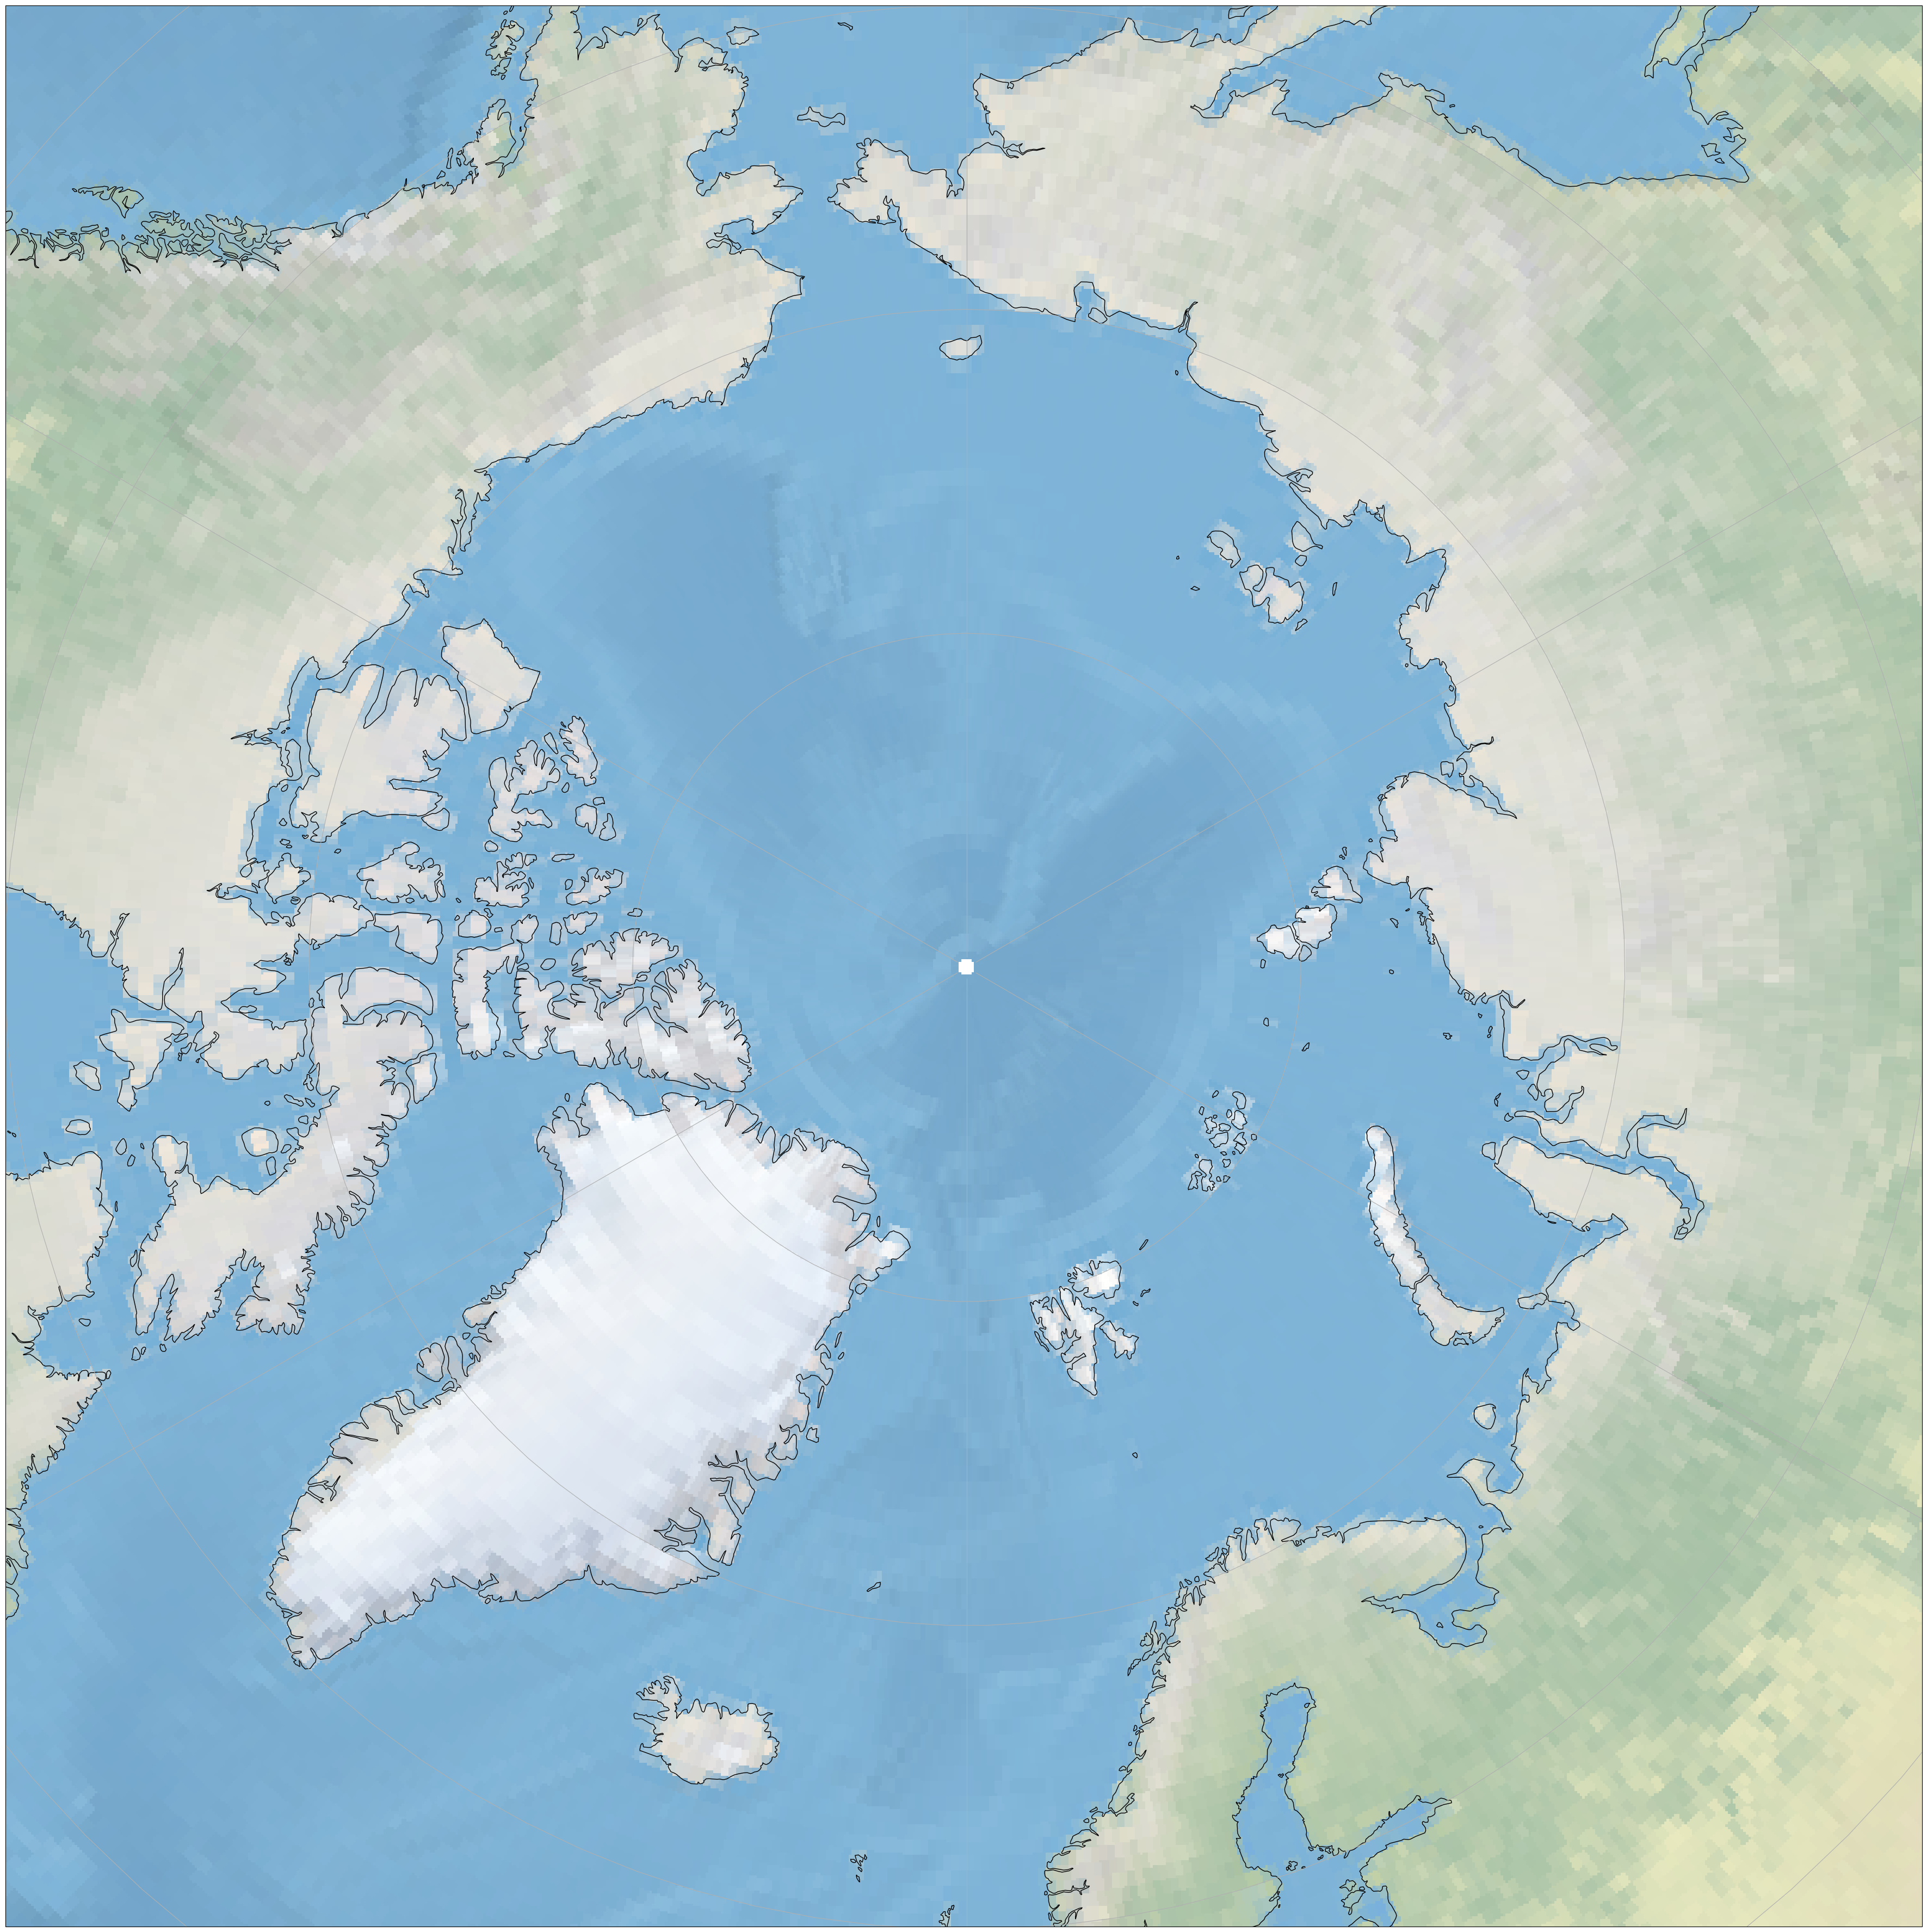

In [22]:
fig = plt.figure(figsize=[100,100])
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))
ax1.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines()

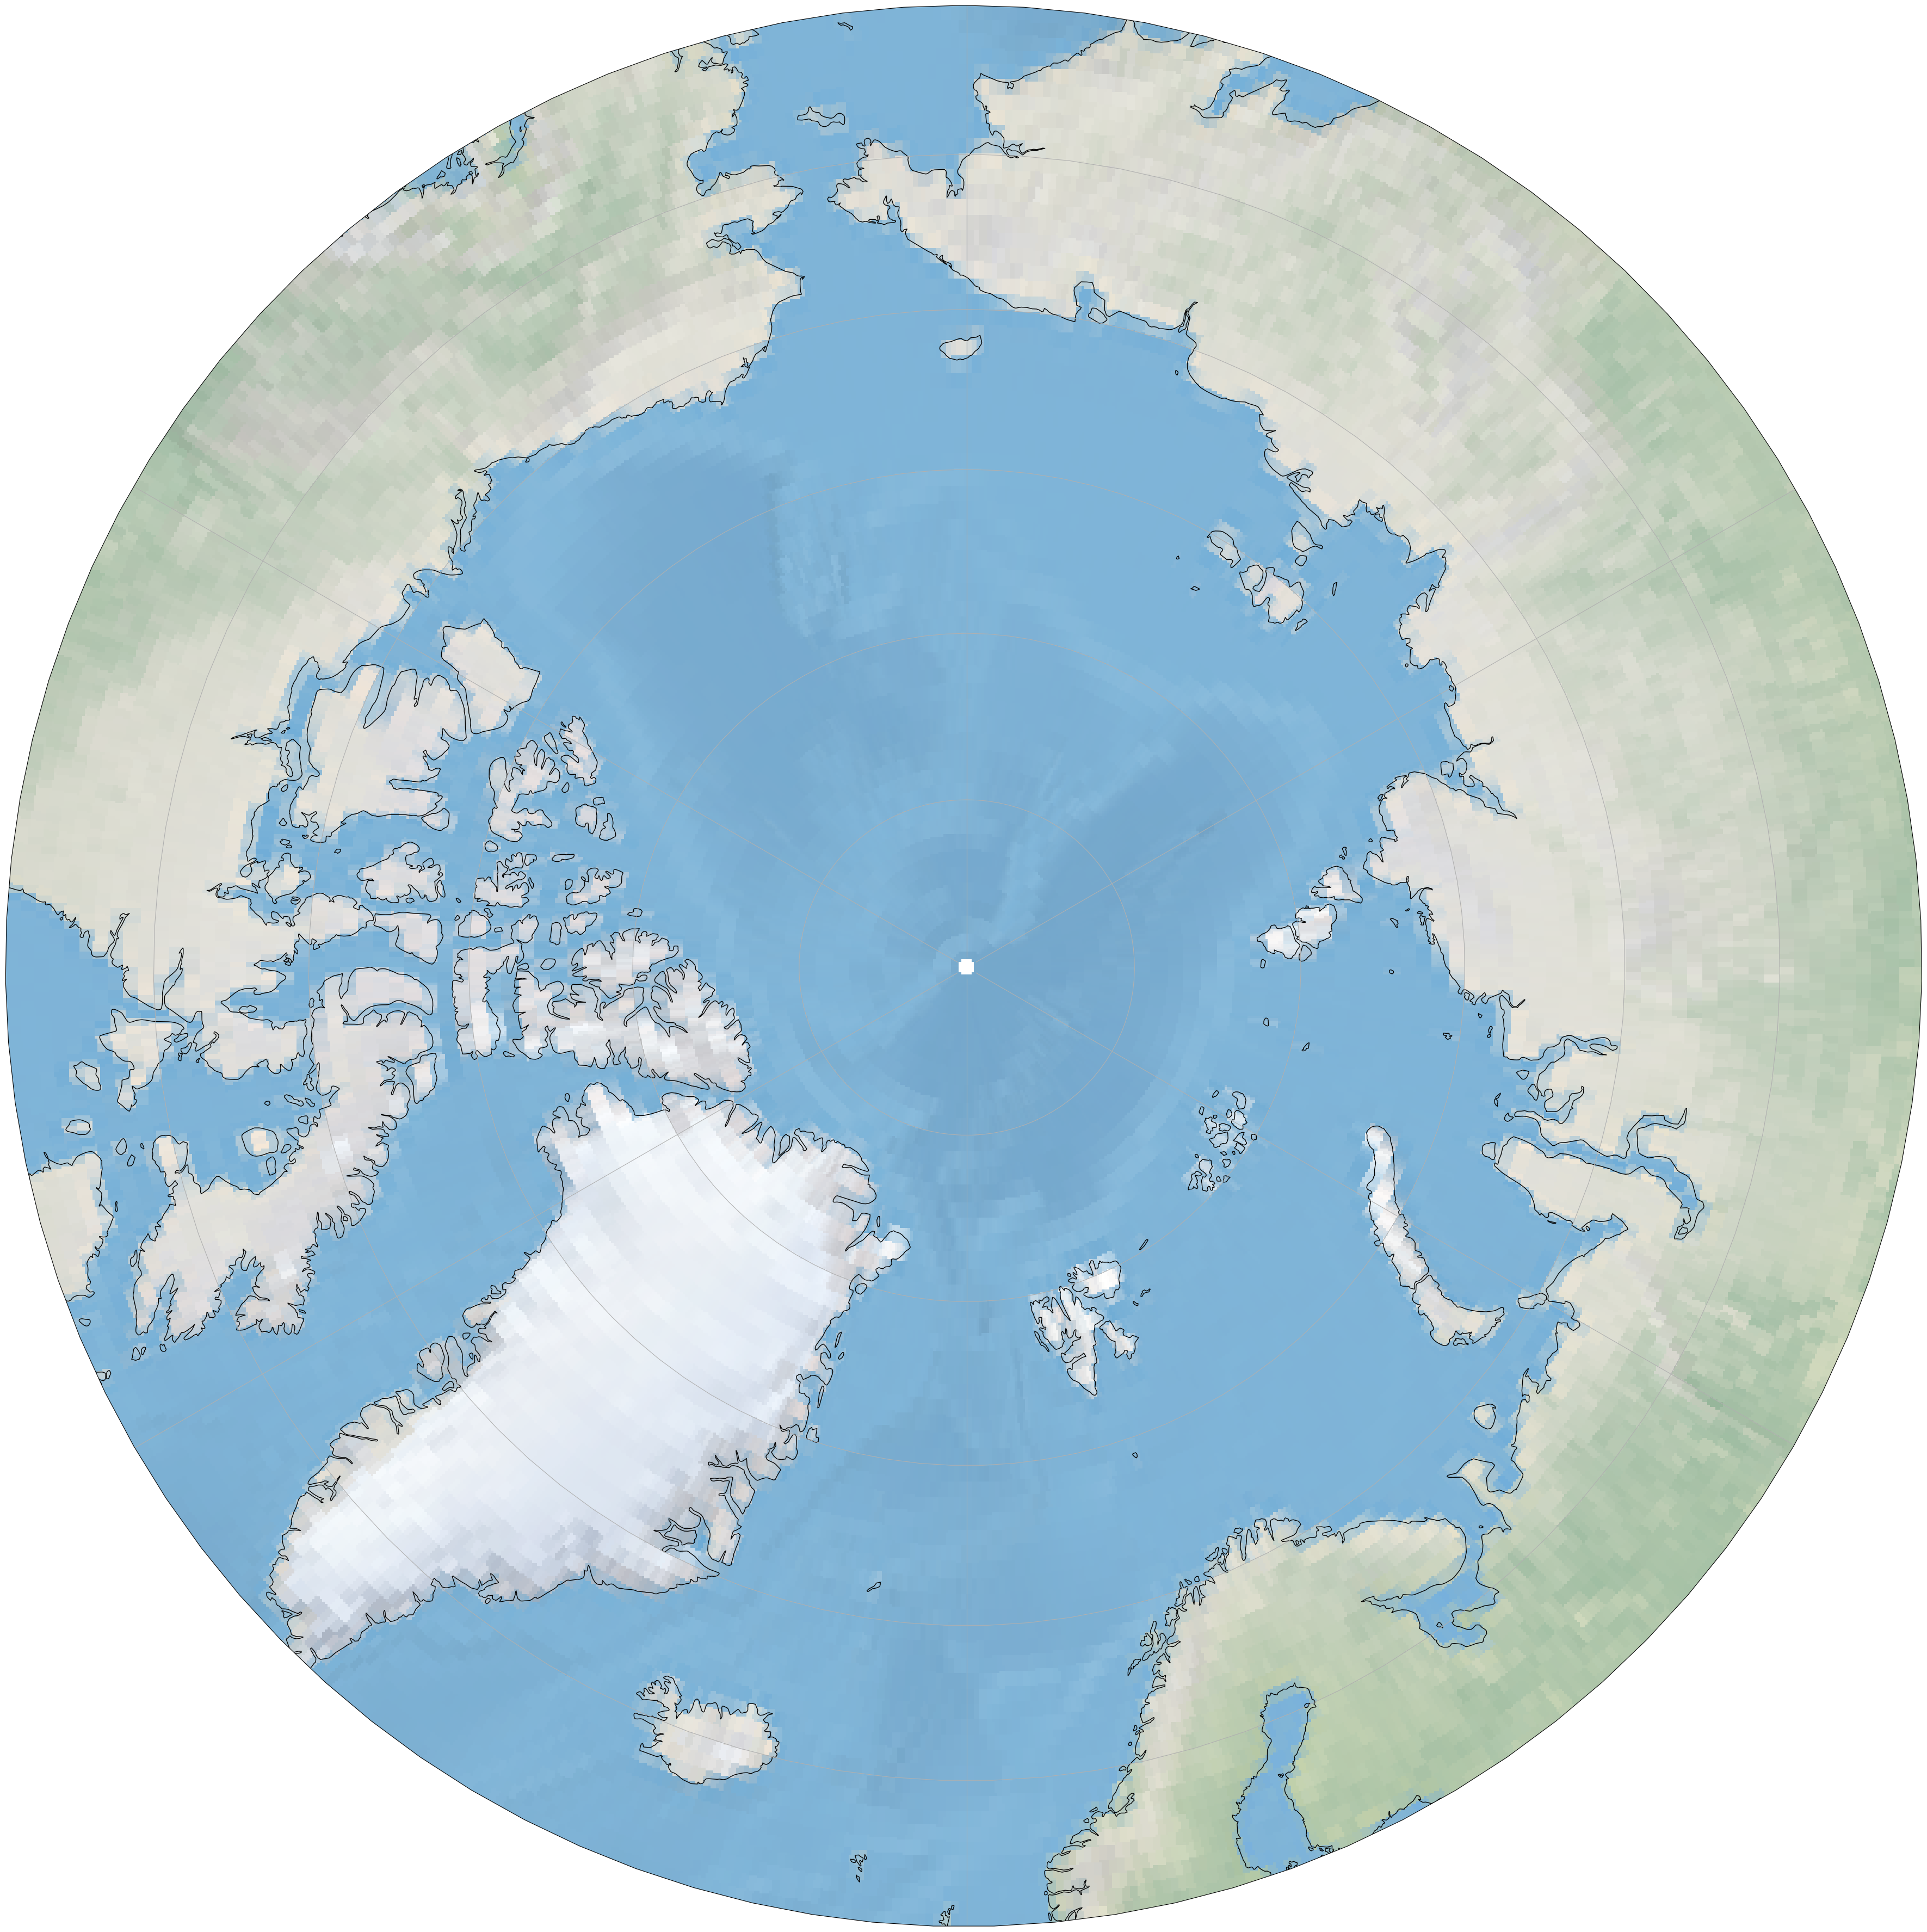

In [23]:
# Define a circular boundary to crop the map within a circular region
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Apply the circular boundary to the polar map to focus on the Arctic region
ax1.set_boundary(circle, transform=ax1.transAxes)

fig

In [10]:
data = pd.read_csv('data/DeltaCAN_Dataset.csv')
data['Longitude']

0      -67.392007
1      -67.113873
2      -66.186670
3      -65.738080
4      -65.399119
          ...    
2707   -91.589671
2708   -90.490307
2709   -90.066634
2710   -89.377180
2711   -89.033991
Name: Longitude, Length: 2712, dtype: float64

In [ ]:
import matplotlib.cm as cm

# Convert 'Tidal range (m)' to numeric, coercing errors to NaN, and drop NaN values
data['Tidal range (m)'] = pd.to_numeric(data['Tidal range (m)'], errors='coerce')
data = data.dropna(subset=['Tidal range (m)'])

# Normalize the tidal range values to the range [0, 1]
norm = plt.Normalize(data['Tidal range (m)'].min(), data['Tidal range (m)'].max())
cmap = cm.get_cmap('viridis')

for index, delta in data.iterrows():
    color = cmap(norm(delta['Tidal range (m)']))
    ax1.plot(delta['Longitude'], delta['Latitude'], marker='o', color=color, markersize=10*delta['Tidal range (m)'], transform=ccrs.PlateCarree())

/var/folders/4s/4yrp136n1dl3pn0kqsvb1w4h0000gn/T/ipykernel_2170/2667352651.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


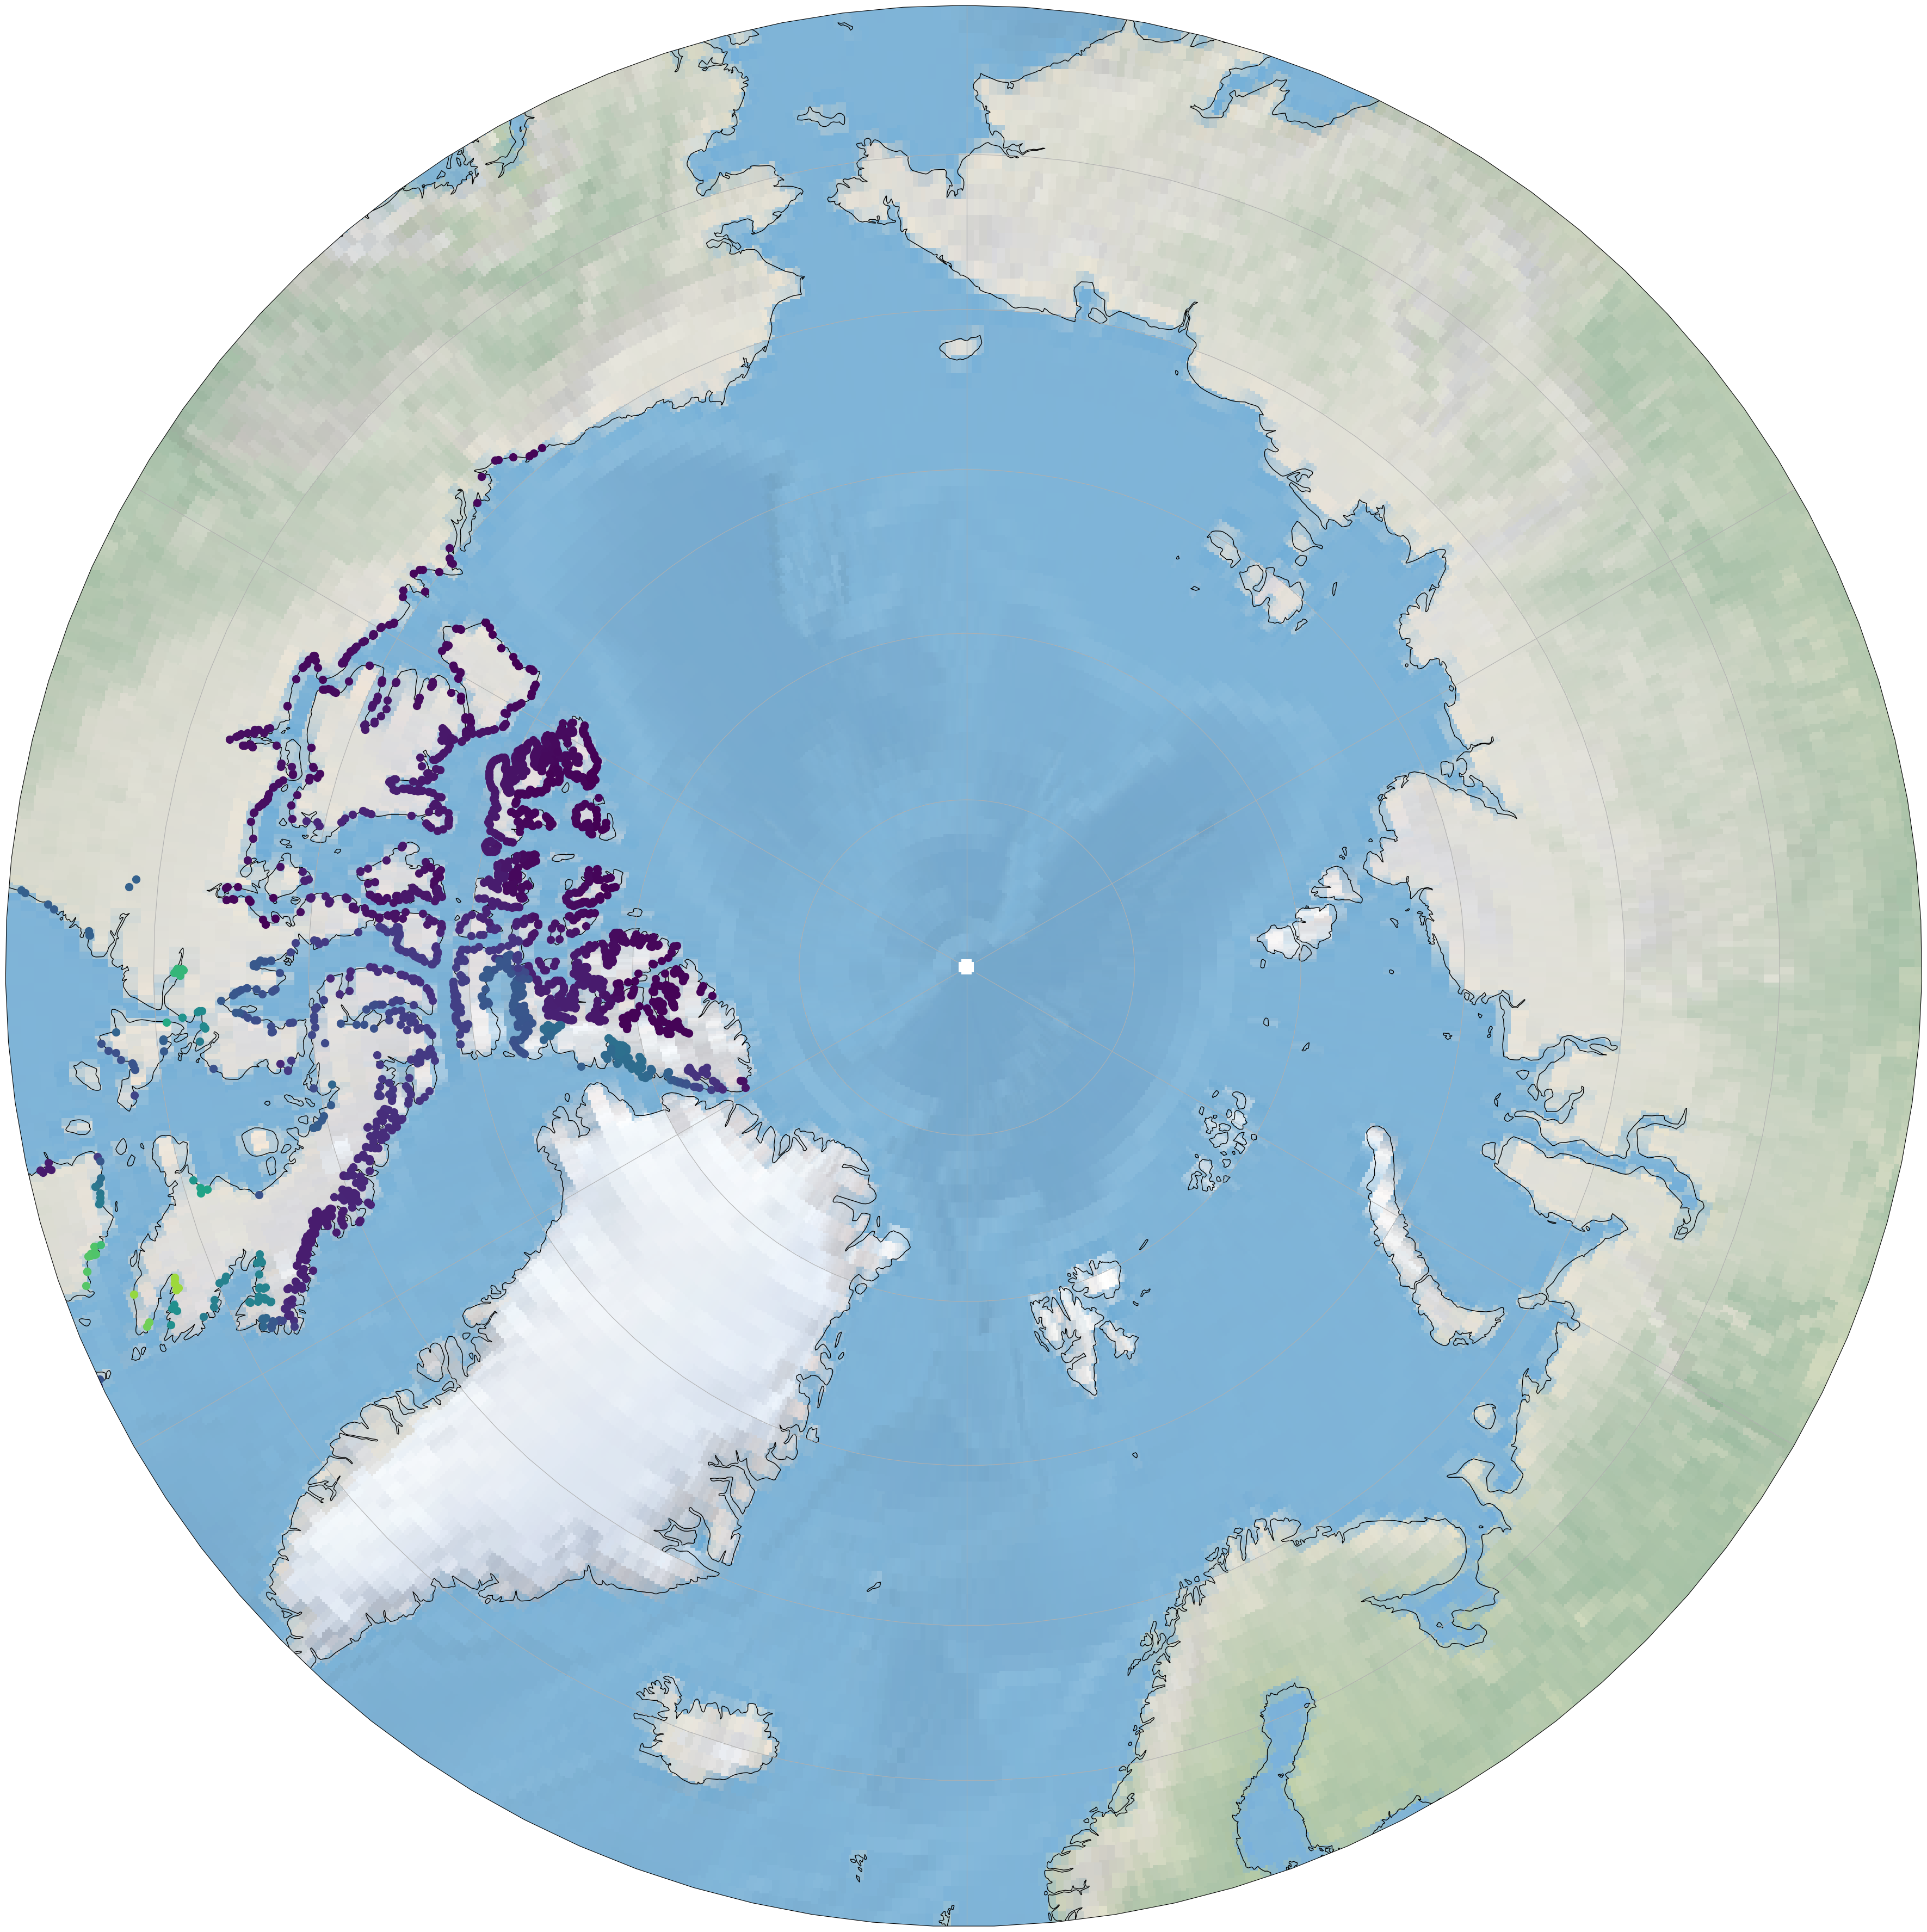

In [27]:
fig

In [13]:
# Save the figure as a high-resolution PNG file and display it
# plt.savefig("cartopy_arctica_01.png", bbox_inches='tight', dpi=200)
plt.show()